
# Monty Hall Problem:  A Probability Paradox
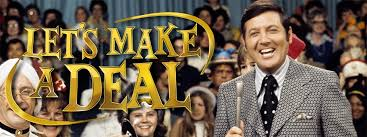

>In situations where additional information is provided, it’s essential to update our beliefs. The Monty Hall problem is a reminder to think analytically rather than relying on intuition.

The Monty Hall Problem is a classic probability puzzle that challenges our intuitive grasp of probabilities, demonstrating how counterintuitive results can emerge in seemingly simple scenarios. This problem highlights a fundamental concept in probability and data science: **the importance of updating our beliefs when new information becomes available.** In the setup, a contestant picks one of three doors, behind one of which is a car (the prize), while goats are behind the other two. After the contestant makes a choice, the host—who knows what’s behind each door—reveals a goat behind one of the remaining doors and offers the contestant a chance to switch to the other unopened door.

**Objective**: This notebook will explore why switching doors significantly increases the chances of winning, despite our initial intuition that the odds would be 50-50. We'll analyze this through both simulation and mathematical reasoning.

**Key Question**: Should the contestant stick with their initial choice or switch to the other door?


(*Its also in [this scene](https://www.youtube.com/watch?v=CYyUuIXzGgI) from the movie 21*)

---

# The Monty Hall Problem Explained

1. **Problem Setup**:
   - The contestant selects one of three doors, let's call it Door A.
   - The host, knowing what's behind each door, opens another door (Door C, for example) that has a goat behind it.
   - The contestant is then offered the choice to switch to the remaining unopened door (Door B) or stick with their original choice (Door A).

2. **Common Intuition**:
   - Many believe that after one door is opened to reveal a goat, the probability of winning by staying or switching becomes 50:50.
   - This intuition feels natural because, with two doors left, it seems like each door would have an equal chance of hiding the car.

3. **Goal**:
   - We'll use a simulation to challenge this intuition on 10,000 trials and demonstrate why switching actually increases the chance of winning.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def monty_hall_simulation(strategy, num_trials=10000):
    """
    Simulates the Monty Hall problem.

    Parameters:
    - strategy: 'stay' or 'switch'
    - num_trials: Number of simulation runs

    Returns:
    - win_rate: Proportion of wins over the total trials
    """
    wins = 0

    for _ in range(num_trials):
        doors = [0, 1, 2]
        car_door = np.random.choice(doors)
        player_choice = np.random.choice(doors)

        # Host reveals a goat door
        possible_doors = [door for door in doors if door != player_choice and door != car_door]
        host_reveal = np.random.choice(possible_doors)

        if strategy == 'stay':
            final_choice = player_choice
        elif strategy == 'switch':
            final_choice = [door for door in doors if door != player_choice and door != host_reveal][0]
        else:
            raise ValueError("Strategy must be 'stay' or 'switch'")

        if final_choice == car_door:
            wins += 1

    win_rate = wins / num_trials
    return win_rate

# Running Simulations
num_trials = 10000
stay_win_rate = monty_hall_simulation('stay', num_trials)
switch_win_rate = monty_hall_simulation('switch', num_trials)


Win rate when staying: 32.82%
Win rate when switching: 66.72%


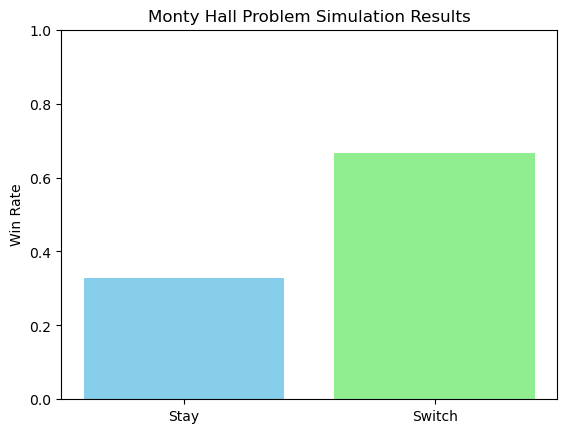

In [2]:
# Display Results
print(f"Win rate when staying: {stay_win_rate * 100:.2f}%")
print(f"Win rate when switching: {switch_win_rate * 100:.2f}%")

# Visualization
strategies = ['Stay', 'Switch']
win_rates = [stay_win_rate, switch_win_rate]

plt.bar(strategies, win_rates, color=['skyblue', 'lightgreen'])
plt.ylabel('Win Rate')
plt.title('Monty Hall Problem Simulation Results')
plt.ylim(0, 1)
plt.show()


### Interpretation
The results show that the win rate when switching is close to 66.67%, while the win rate when staying is about 33.33%. This clearly demonstrates that switching doors gives a significantly higher probability of winning the car. This outcome is counterintuitive because our initial assumption is that each door would have an equal chance once one is eliminated. However, as the simulation confirms, switching doubles the odds of winning.

# Why Switching is Better: A Thought Experiment

To better understand why switching is the optimal strategy, let's consider a variation of the problem with 100 doors (N=100).

1. **Imagine 100 Doors**:
   - The contestant picks one door out of 100, with only a 1% chance that they chose the correct door.
   - The host then reveals 98 other doors, all of which contain goats, leaving only two doors: the one initially chosen and one other unopened door.

2. **Inference**:
   - The probability that the car is behind the remaining unopened door (not initially chosen) is now 99%. This makes it clear that switching is the better choice.
   - This example with a large number of doors shows how the host’s actions reveal information that should influence our choice.


Win rate when staying with 100 doors: 0.99%
Win rate when switching with 100 doors: 99.06%


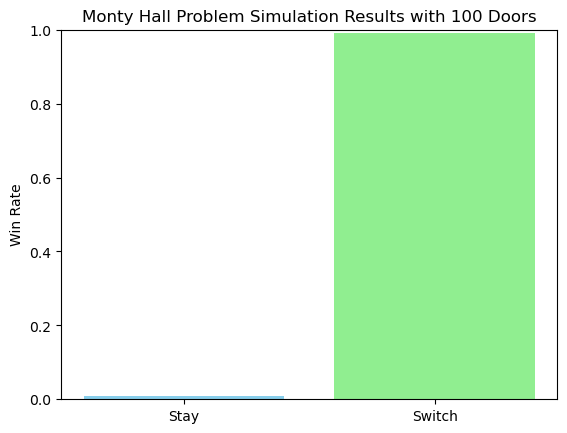

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def monty_hall_large_n(strategy, num_doors=100, num_trials=10000):
    wins = 0
    for _ in range(num_trials):
        doors = list(range(num_doors))
        car_door = np.random.choice(doors)
        player_choice = np.random.choice(doors)
        
        # Host reveals (num_doors - 2) doors that have goats
        possible_doors = [door for door in doors if door != player_choice and door != car_door]
        host_reveals = np.random.choice(possible_doors, num_doors - 2, replace=False)
        
        if strategy == 'stay':
            final_choice = player_choice
        elif strategy == 'switch':
            final_choice = [door for door in doors if door != player_choice and door not in host_reveals][0]
        else:
            raise ValueError("Strategy must be 'stay' or 'switch'")
        
        if final_choice == car_door:
            wins += 1

    return wins / num_trials

# Running Large N Experiment
large_n_stay_win_rate = monty_hall_large_n('stay', num_doors=100, num_trials=10000)
large_n_switch_win_rate = monty_hall_large_n('switch', num_doors=100, num_trials=10000)

print(f"Win rate when staying with 100 doors: {large_n_stay_win_rate * 100:.2f}%")
print(f"Win rate when switching with 100 doors: {large_n_switch_win_rate * 100:.2f}%")

# Visualization
strategies = ['Stay', 'Switch']
win_rates = [large_n_stay_win_rate, large_n_switch_win_rate]

plt.bar(strategies, win_rates, color=['skyblue', 'lightgreen'])
plt.ylabel('Win Rate')
plt.title('Monty Hall Problem Simulation Results with 100 Doors')
plt.ylim(0, 1)
plt.show()


# Bayes’ Theorem and Belief Updating

The Monty Hall problem illustrates an important principle in probability theory: **updating beliefs based on new information**. Bayes’ theorem formalizes this by allowing us to calculate the probability of an event given prior knowledge and new data.

In the Monty Hall setup, we can consider:
- $P(D_i)$: The prior probability that each door $D_i$ has the car, which is initially  $\frac{1}{3}$.
- $P(H_j | D_i) $: The likelihood that the host opens a specific door given where the car is.
- $P(D_i | H_j)$: The posterior probability of the car being behind each door after observing the host’s choice.

### Bayes’ Theorem Applied to Monty Hall

If the host opens Door C, and the contestant initially picked Door A, we calculate the probability that switching will win the car using Bayes’ theorem:

$
P(D_B | H_C) = \frac{P(H_C | D_B) P(D_B)}{P(H_C)}
$

Where:
- $P(H_C | D_B) = 1 $ because the host will reveal Door C if the car is behind Door B.
- $P(D_B) = \frac{1}{3} $, as each door initially has an equal chance.
- $P(H_C) = \frac{1}{2} $, as the host could reveal either Door B or Door C with equal likelihood if the car is behind Door A.

Plugging these values into Bayes’ theorem confirms that switching yields a probability of $\frac{2}{3}$.

## Applications of Bayesian Updating

Bayesian updating, as shown here, is critical for data science applications. Here’s how it’s useful:
- **Incorporating New Information**: Bayesian methods allow data scientists to update predictions as new data becomes available, improving model accuracy.
- **Handling Uncertainty**: Bayesian approaches provide a framework to quantify uncertainty, making them ideal for fields like predictive modeling, recommendation systems, and more.
- **Personalization**: Bayesian inference enables personalized recommendations by updating beliefs about user preferences based on observed behavior.

This approach not only clarifies the Monty Hall problem but also highlights a core data science principle: we should constantly refine our models and predictions with each new piece of evidence.

### Widely Used Bayesian Applications in Practice

In practice, Bayesian updating is particularly popular in fields where adapting to new data and handling uncertainty are essential:

- **Recommendation Systems**: Bayesian approaches, like Bayesian Personalized Ranking (BPR), enable adaptive recommendations by updating beliefs about user preferences as they interact with items. This is widely applied in e-commerce and streaming services.
    - See this [post](https://nbviewer.org/github/ethen8181/machine-learning/blob/master/recsys/4_bpr.ipynb) by MingYu (Ethen) Liu for a BPR from scratch implementation.
- **Time Series Forecasting**: Models like Bayesian Structural Time Series (BSTS) use Bayesian updating to refine forecasts continuously based on incoming data, making them effective for financial forecasting, network monitoring, and inventory management.
- **Medical Diagnostics and Personalized Medicine**: Bayesian methods allow for personalized patient care by incorporating prior medical knowledge and updating it with patient-specific data. This is especially useful in diagnostics and adjusting drug dosages dynamically.

These applications illustrate how Bayesian updating can transform data-driven systems into adaptive, uncertainty-aware solutions across diverse domains.


# Conclusion

The Monty Hall problem demonstrates a key principle in probability: sometimes, our intuitive understanding can be misleading. While it might seem natural to think that the chance of winning is 50:50 after one door is opened, a closer look at the probabilities shows that switching doors actually doubles the likelihood of winning.

**Key Takeaway**: In situations where additional information is provided, like the host revealing a goat, it’s essential to update our beliefs. The Monty Hall problem is a reminder to think analytically rather than relying on intuition.

---

# Technical Appendix

## Mathematical Derivation Using Conditional Probability

Let’s denote:
- $ C $: The event that the car is behind the initially chosen door.
- $ H $: The event that the host reveals a goat behind one of the other doors.
- $ S $: The event that the contestant switches doors.

### Probability of Winning by Staying

The probability that the car is behind the initially chosen door is:

$
P(C) = \frac{1}{3}
$

Since staying means not changing the initial choice, the probability of winning by staying is:

$
P(\text{Win by Staying}) = P(C) = \frac{1}{3}
$

### Probability of Winning by Switching

If the contestant switches, they win if the car is behind one of the other doors. The probability that the car is not behind the initially chosen door is:

$
P(C)^{-} = 1 - P(C) = \frac{2}{3}
$

Therefore, the probability of winning by switching is:

$
P(\text{Win by Switching}) = P(C)^{-} = \frac{2}{3}
$

### Bayesian Analysis

Alternatively, we can use Bayes' theorem to compute the probability of winning by switching after the host reveals a goat.

**Let’s define:**
- $D_i $: The event that the car is behind door \( i \).
- $ H_j $: The event that the host opens door \( j \).

Assuming the contestant picks door 1 and the host opens door 2, we want to find $ P(D_3 | H_2) $, the probability that the car is behind door 3 given that the host opened door 2.

By Bayes' theorem:

$
P(D_3 | H_2) = \frac{P(H_2 | D_3) P(D_3)}{P(H_2)}
$

**Calculating the probabilities:**

- Prior probabilities:
    $
    P(D_1) = P(D_2) = P(D_3) = \frac{1}{3}
    $

- The host will not open the door with the car or the contestant's choice:
    $
    P(H_2 | D_3) = 1 \quad \text{(since the host cannot open door 3)}
    $

- Total probability of the host opening door 2:
    $
    P(H_2) = P(H_2 | D_1) P(D_1) + P(H_2 | D_2) P(D_2) + P(H_2 | D_3) P(D_3)
    $
    $
    P(H_2) = \left( \frac{1}{2} \times \frac{1}{3} \right) + \left( 0 \times \frac{1}{3} \right) + \left( 1 \times \frac{1}{3} \right) = \frac{1}{6} + 0 + \frac{1}{3} = \frac{1}{2}
    $

**Plugging back into Bayes' theorem:**

$
P(D_3 | H_2) = \frac{1 \times \frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}
$

This confirms that the probability of winning by switching is $ \frac{2}{3} $.


## Generalized for $ N $ Doors

To generalize the Monty Hall problem for $ N $ doors, let’s denote:
- $ D_i $: The event that the car is behind door $ i $.
- $ H $: The event that the host reveals $ N-2 $ doors with goats.

Assuming the contestant picks door $ D_1 $ and the host reveals all other doors except $ D_1 $ and one remaining door $ D_k $, we want to find the probability $ P(D_k | H) $, the probability that the car is behind door $ D_k $ given the host’s reveal.

### Applying Bayes' Theorem

By Bayes' theorem:

$
P(D_k | H) = \frac{P(H | D_k) \cdot P(D_k)}{P(H)}
$

where:
- $ P(D_k) = \frac{1}{N} $, since each door initially has an equal chance.
- $ P(H | D_k) = 1 $ because the host will reveal $ N-2 $ doors with goats if the car is behind $ D_k $.
- $ P(H) $ is the total probability of the host's reveal.

### Calculating $ P(H) $

The total probability \( P(H) \) that the host reveals \( N-2 \) doors with goats depends on the initial choice of door and the location of the car:

$
P(H) = P(H | D_1) \cdot P(D_1) + P(H | D_2) \cdot P(D_2) + \cdots + P(H | D_N) \cdot P(D_N)
$

Since each $P(D_i) = \frac{1}{N}$, this becomes:

$
P(H) = \frac{N - 1}{N}
$

### Final Calculation of $P(D_k | H) $

Now we can substitute into Bayes' theorem:

$
P(D_k | H) = \frac{P(H | D_k) \cdot P(D_k)}{P(H)} = \frac{1 \cdot \frac{1}{N}}{\frac{N - 1}{N}} = \frac{N - 1}{N}
$

Thus, as $ N $ grows larger, the probability of winning by switching approaches 1.

